<a href="https://colab.research.google.com/github/joyfulspace/ADP/blob/master/07_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_9_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀분석
- 둘 중의 하나를 맞추는 문제이며 해답은 확률
- 멀티클래스 문제에도 적용 가능
- 시그모이드 함수
  - $Sigmoid(x) = \frac{1}{1+e^{-x}}$. $x \in (-\infty, \infty), y\in [0,1]$
- 변형된 회귀분석
  - $sigmoid(x)=σ(y)=σ(w^tx+b)$
- 수식
  - 긍정일 확률 $P(Y=1|x)=\frac{e^{w^Tx+b}}{1+e^{w^Tx+b}}=σ(w^Tx+b)$
  - 부정일 확률 $P(Y=0|x)=1-(P(Y=1|x)=\frac{1}{1+e^{w^Tx+b}}$
  - x가 정의되었을 때, y=1일 조건부 확률을 시그모이드 함수로 나타냄  
    $\frac{P(Y=1|x)}{1-P(Y=1|x)}=e^{w^Tx+b}$  
    $\ln{\frac{P(Y=1|x)}{1-P(Y=1|x)}}=w^Tx+b$  
    $\ln{Odds Ratio} = w^Tx+b$: Odds Ratio에 log를 취하면 일반 회귀 모델이 됨(Odds Ratio=$\frac{긍정일확률}{부정일확률}$)


    

## 실습1

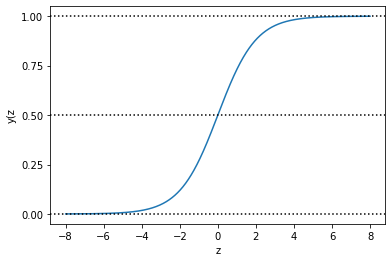

In [ ]:
# 시그모이드 함수의 그림
import numpy as np

def sigmoid(input):
  return 1.0/(1+np.exp(-input))

import matplotlib.pyplot as plt
z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
plt.plot(z, y)
plt.axhline(y=0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# 아이리스(붓꽃)의 데이터를 가져온다.
iris = datasets.load_iris()
X = iris.data[:, :2] # 처음 2개의 feature(속성)을 가져온다
Y = iris.target      # 우리가 예측할 class(붓꽃의 분류)

# multi class가 가능하도록 옵션을 준다.
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# 데이터를 훈련
logreg.fit(X, Y)

# 데이터의 시각화
x_min, x_max = X[:, 0].min()-.5, X[:, 0].max()+.5
y_min, y_max = X[:, 1].min()-.5, X[:, 1].max()+.5
h = .02 # mesh의 step size
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # 격자형 좌표를 추출한다

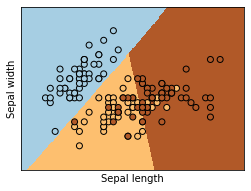

In [ ]:
# 추출한 격자형 데이터로 Z를 예측한다.
# ravel()을 통하여 1차원배열로 바꾼 후에 c_를 통하여 연결한다.
# Z는 모델이 예측한 값으로 붓꽃의 3개의 class를 반환한다.
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# 격자안에 들어갈 color_Z를 세팅하고 그린다.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4,3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# 원래 iris의 관측값인 X를 점으로 찍고 color은 class를 나타내도록 한다.
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# 좌표계의 min과 max를 설정한다.
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
Z, Z.shape

(array([[0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        ...,
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2]]), (171, 231))

In [ ]:
xx, xx.shape

(array([[3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        ...,
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ]]), (171, 231))

In [ ]:
yy, yy.shape

(array([[1.5 , 1.5 , 1.5 , ..., 1.5 , 1.5 , 1.5 ],
        [1.52, 1.52, 1.52, ..., 1.52, 1.52, 1.52],
        [1.54, 1.54, 1.54, ..., 1.54, 1.54, 1.54],
        ...,
        [4.86, 4.86, 4.86, ..., 4.86, 4.86, 4.86],
        [4.88, 4.88, 4.88, ..., 4.88, 4.88, 4.88],
        [4.9 , 4.9 , 4.9 , ..., 4.9 , 4.9 , 4.9 ]]), (171, 231))

## 실습2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
# 그래프의 크기를 세팅
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [3]:
# 타이타닉 데이터를 불러온다.
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


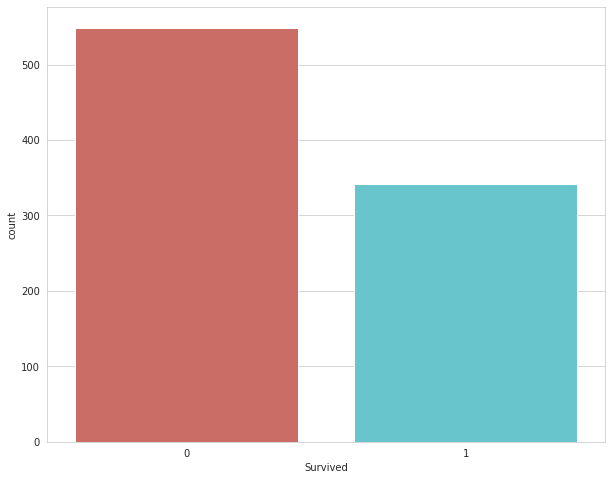

In [4]:
# 우리가 예측할 값은 생존여부인 'Survived'이므로 이것의 분포를 알아본다.
sb.countplot(x='Survived', data=titanic, palette='hls')

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# 독립변수를 쓸 데이터를 정리한다. (일부 불필요한 컬럼은 삭제)
titanic_data = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1)
titanic_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


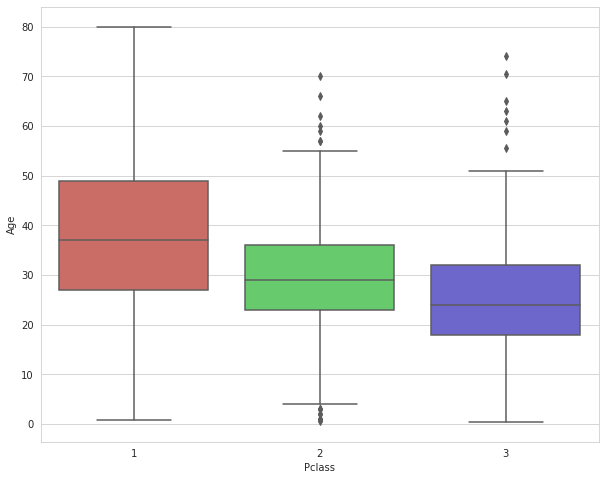

In [7]:
# Pclass(여행객의 클래스)에 따른 나이분포를 boxplot로 나타낸다.
sb.boxplot(x='Pclass', y='Age', data=titanic_data, palette='hls')

In [8]:
# age가 null인 경우의 결측값을 채우기 위하여 Pclass에 따른 나이값을 세팅한다.
def age_approx(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    elif Pclass==3:
      return 24
  else:
    return Age

In [9]:
# 나이가 null인 경우의 결측값을 적당한 값으로 채운다.
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [10]:
# 나머지의 NA데이터를 버린다.
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
# 범주형 변수인 Sex, Embarked 데이터를 숫자로 변환한다.
pd.get_dummies(titanic_data['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [12]:
pd.get_dummies(titanic_data['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [14]:
# 성별변수를 숫자인 gender로 변환한다.
gender = pd.get_dummies(titanic_data['Sex'], drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [15]:
# embark 범주형 변수를 숫자로 변환하여 embark_location에 저장한다.
embark_location = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark_location.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [16]:
# 불필요한 'Sex', 'Embarked' 칼럼을 버린다.
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [17]:
# Sex, Embarked 대신에 숫자로 변환한 새로 만든 컴럼을 삽입
titanic_dmy = pd.concat([titanic_data, gender, embark_location], axis=1)
titanic_dmy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


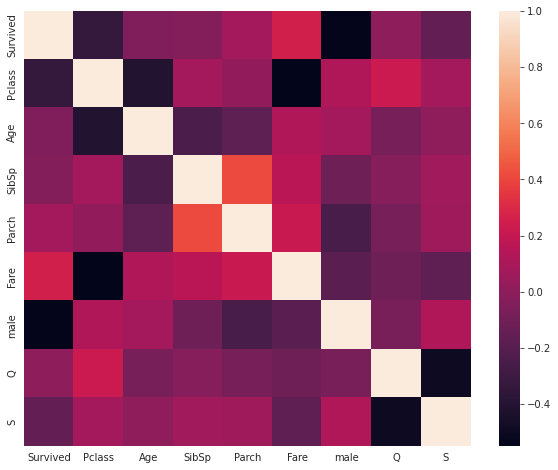

In [18]:
# 독립변수 간의 상관관계 그래프를 그린다.
sb.heatmap(titanic_dmy.corr())

In [19]:
# 상관관계가 높은 Fare, Pclass를 버린다
titanic_dmy.drop(['Fare', 'Pclass'], axis=1, inplace=True)
titanic_dmy.head()

,Survived,Age,SibSp,Parch,male,Q,S
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,0,35.0,0,0,1,0,1


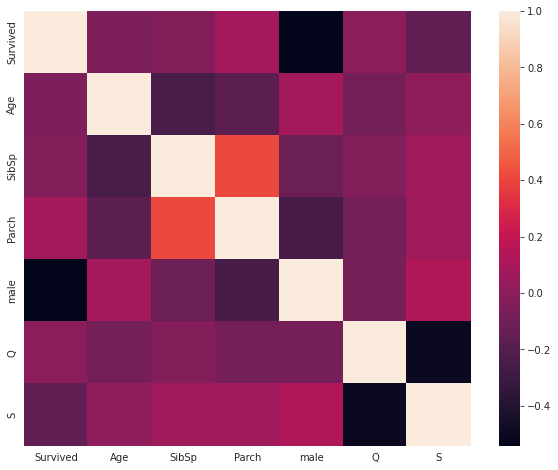

In [20]:
sb.heatmap(titanic_dmy.corr())

In [21]:
# 지금까지 작업한 최종정보
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    int64  
 3   Parch     889 non-null    int64  
 4   male      889 non-null    uint8  
 5   Q         889 non-null    uint8  
 6   S         889 non-null    uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 37.3 KB


In [26]:
# Survived를 target인 Y로 정하고 나머지 변수를 독립변수 X로 세팅한다.
X = titanic_dmy.iloc[:, [1,2,3,4,5,6]].values
y = titanic_dmy.iloc[:, 0].values

In [27]:
X, y

(array([[22.,  1.,  0.,  1.,  0.,  1.],
        [38.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  0.,  0.,  1.],
        [26.,  0.,  0.,  1.,  0.,  0.],
        [32.,  0.,  0.,  1.,  1.,  0.]]),
 array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
     

In [28]:
# 훈련데이터와 테스트데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=25)

In [30]:
# 모델을 만들고 훈련을 시킨다.
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [31]:
# 테스트데이터로 예측값을 얻어낸다.
y_pred = LogReg.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1])

In [33]:
# 평가하기 위한 혼돈행렬을 출력한다
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[137,  27],
       [ 34,  69]])

In [34]:
# 정확도, recall등의 평가수치를 출력한다
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       164
           1       0.72      0.67      0.69       103

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267

